# Predictive Health Assessment: Leveraging DHS Data for Targeted Interventions in Kenya


**Authors**: [Alpha Guya](mailto:alpha.guya@student.moringaschool.com), [Ben Ochoro](mailto:ben.ochoro@student.moringaschool.com), [Caleb Ochieng](mailto:caleb.ochieng@student.moringaschool.com), [Christine Mukiri](mailto:christine.mukiri@student.moringaschool.com), [Dominic Muli](mailto:dominic.muli@student.moringaschool.com), [Frank Mandele](mailto:frank.mandele@student.moringaschool.com), [Jacquiline Tulinye](mailto:jacquiline.tulinye@student.moringaschool.com) and [Lesley Wanjiku](mailto:lesley.wanjiku@student.moringaschool.com)

## 1.0) Project Overview

Our project focuses on using machine learning techniques and data sourced from the Demographic and Health Surveys (DHS) program to generate predictive models aimed at evaluating individual and household health risks in Kenya. By analyzing various set of demographic, socio-economic, and health-related indicators, we target to develop reliable predictive models capable of estimating the likelihood of malnutrition, disease prevalence, and various health risks within certain communities. The goal is to provide users such as public health officials with targeted insights. This will enable more effective allotment of resources and interventions. This proactive approach is geared to optimize the impact of health initiatives, allowing for the prioritization and customization of interventions to at risk populations, ultimately contributing to the improvement of health outcomes in Kenya.

## 1.1) Business Problem

Despite existing health interventions, Kenya encounters difficulties in effectively targeting resources and interventions. This will help to address individual and household health risks, including malnutrition, diseases, and other health concerns. This fault highlights the need for a predictive and targeted approach to allocate resources and interventions more effectively. Leveraging machine learning models built upon Demographic and Health Surveys (DHS) data, the project aims to develop predictive models capable of assessing the likelihood of malnutrition, disease prevalence, and health risks based on individual and household characteristics. By accurately identifying at-risk populations, this solution seeks to empower decision-makers and public health officials to allocate resources on need basis, ultimately increasing the impact of health interventions and improving overall health outcomes in Kenya.

## 1.2) Objectives


Based on the data provided by DHS(Demographic and Health Surveys) , some of the objectives include:

* To analyze trends in health indicators over time.

* To predict Health Risks based on individual and household characteristics. 

* To find the relationship between the most common diseases and the demographic.

*  To Build predictive models to estimate health outcomes based on various demographic and socio-economic factors.

*  To identify regional variations in health indicators.

* To Identify factors contributing to changes in health outcomes.

* To Conduct comprehensive feature engineering to extract relevant features from DHS data, considering demographic, socio-economic, and health-related variables.


### API Deployment and Usability

Deploy an accessible API interface for stakeholders to input data and receive health risk predictions based on the developed models.

### Recommendations and Conclusion
* Targeted Intervention Recommendations:

Utilize model predictions to generate targeted recommendations for health interventions and resource allocation in specific Kenyan communities.

* Impact Assessment and Validation:

Assess the real-world impact of model-guided interventions by monitoring and evaluating changes in health outcomes in targeted Kenyan populations.

## 1.3) Metric of Success

* Achieve a predictive accuracy of at least 90% on unseen validation data.
* Identify and utilize the top 10 most influential features contributing to the models' predictive power.
* Generate clear and interpretable explanations for at least 70% of model predictions.
* Create a prioritized list of actionable recommendations based on identified health risks for at least 100 of communities.
* Ensure an API uptime of at least 90% and gather feedback on usability for further improvements.
* Measure the effectiveness of interventions by observing changes in health indicators, aiming for improvements in at least 80% of targeted communities.

## 1.4) Data Relevance and Validation

The data available is relevant for the intended analysis and predictions

## 2.0) Understanding the Data

The data for this project is obtained from the [DHS Program website](https://dhsprogram.com/data/dataset/Kenya_Standard-DHS_2022.cfm?flag=0).
The encoding for this dataset is explained [here](./Recode7_DHS_10Sep2018_DHSG4.pdf).

## 2.1) Reading the Data

### 2.1.1) Installations

In [1]:
# installations
# %pip install requests
# %pip install pyreadstat
# %pip install --upgrade openpyxl
# %pip install seaborn --upgrade


### 2.1.2) Importing Relevant Libraries

In [2]:
# importing necessary libraries
import requests, json
import urllib
import urllib.request
import urllib.error
import pandas as pd
import numpy as np
import pyreadstat
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

### 2.1.3) Reading the Data

In [3]:
# A function to read get json file from API endpoint
def fetch_dhs_data(api_endpoint):
    try:
        response = requests.get(api_endpoint)

        if response.status_code == 200:
            data = response.json()
            return data
        else:
            print(f"Request failed with status code {response.status_code}")
            return None

    except requests.RequestException as e:
        print(f"Request Exception: {e}")
        return None


In [4]:
# Accessing DHS program KE data indicators using API
api_endpoint = 'https://api.dhsprogram.com/rest/dhs/data?breakdown=national&countryIds=KE&lang=en&f=json'

dhs_ke_data_json = fetch_dhs_data(api_endpoint)
if dhs_ke_data_json:
    print("Data retrieved successfully:")
else:
    print("Failed to retrieve data from the API.")

Data retrieved successfully:


In [5]:
# converting the json response into a pandas DataFrame
dhs_data_list = dhs_ke_data_json.get('Data', [])
ke_data = pd.json_normalize(dhs_data_list)
# Setting the maximum number of columns to display in the DataFrame
pd.set_option('display.max_columns', 28)
ke_data

,DataId,SurveyId,Indicator,IsPreferred,Value,SDRID,Precision,RegionId,SurveyYearLabel,SurveyType,SurveyYear,IndicatorOrder,DHS_CountryCode,CILow,CountryName,IndicatorType,CharacteristicId,CharacteristicCategory,IndicatorId,CharacteristicOrder,CharacteristicLabel,ByVariableLabel,DenominatorUnweighted,DenominatorWeighted,CIHigh,IsTotal,ByVariableId,LevelRank
0,417227,KE1989DHS,Age specific fertility rate: 10-14,1,2.0,FEFRTRWA10,0,,1989,DHS,1989,11763005,KE,,Kenya,I,1000,Total,FE_FRTR_W_A10,0,Total,,,,,1,0,
1,417228,KE1989DHS,Age specific fertility rate: 15-19,1,153.0,FEFRTRWA15,0,,1989,DHS,1989,11763010,KE,,Kenya,I,1000,Total,FE_FRTR_W_A15,0,Total,,,,,1,0,
2,417237,KE1989DHS,Age specific fertility rate: 20-24,1,324.0,FEFRTRWA20,0,,1989,DHS,1989,11763020,KE,,Kenya,I,1000,Total,FE_FRTR_W_A20,0,Total,,,,,1,0,
3,417238,KE1989DHS,Age specific fertility rate: 25-29,1,301.0,FEFRTRWA25,0,,1989,DHS,1989,11763030,KE,,Kenya,I,1000,Total,FE_FRTR_W_A25,0,Total,,,,,1,0,
4,417239,KE1989DHS,Age specific fertility rate: 30-34,1,243.0,FEFRTRWA30,0,,1989,DHS,1989,11763040,KE,,Kenya,I,1000,Total,FE_FRTR_W_A30,0,Total,,,,,1,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,645601,KE1998DHS,DPT 1 vaccination received,0,95.6,CHVACSCDP1,1,,1998,DHS,1998,93836020,KE,,Kenya,I,268002,Source of vaccination information,CH_VACS_C_DP1,268002,Either source,24-35,1040.0,1021.0,,1,258002,
3996,110058,KE1998DHS,DPT 2 vaccination received,1,90.0,CHVACSCDP2,1,,1998,DHS,1998,93836030,KE,,Kenya,I,268002,Source of vaccination information,CH_VACS_C_DP2,268002,Either source,12-23,1127.0,1097.0,,1,258001,
3997,645602,KE1998DHS,DPT 2 vaccination received,0,90.2,CHVACSCDP2,1,,1998,DHS,1998,93836030,KE,,Kenya,I,268002,Source of vaccination information,CH_VACS_C_DP2,268002,Either source,24-35,1040.0,1021.0,,1,258002,
3998,110047,KE1998DHS,DPT 3 vaccination received,1,79.2,CHVACSCDP3,1,,1998,DHS,1998,93836040,KE,,Kenya,I,268002,Source of vaccination information,CH_VACS_C_DP3,268002,Either source,12-23,1127.0,1097.0,,1,258001,


Observation: we will work with

In [6]:
# Reading downloaded relevant data
df, meta = pyreadstat.read_sav("./data/KEHR8BFL.SAV")
df_2, meta_2 = pyreadstat.read_sav("./data/KEHR81FL.SAV")

In [7]:
df

,HHID,HV000,HV001,HV002,HV003,HV004,HV005,HV006,HV007,HV008,HV008A,HV009,HV010,HV011,...,SH305D$09,SH305D$10,SH305D$11,SH305E$01,SH305E$02,SH305E$03,SH305E$04,SH305E$05,SH305E$06,SH305E$07,SH305E$08,SH305E$09,SH305E$10,SH305E$11
0,1 4,KE8,1.0,4.0,2.0,1.0,1306431.0,4.0,2022.0,1468.0,44676.0,6.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1 7,KE8,1.0,7.0,2.0,1.0,1306431.0,4.0,2022.0,1468.0,44676.0,3.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1 10,KE8,1.0,10.0,1.0,1.0,1306431.0,4.0,2022.0,1468.0,44677.0,2.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1 13,KE8,1.0,13.0,4.0,1.0,1306431.0,4.0,2022.0,1468.0,44676.0,8.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1 17,KE8,1.0,17.0,1.0,1.0,1306431.0,4.0,2022.0,1468.0,44677.0,3.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37906,1692 77,KE8,1692.0,77.0,2.0,1692.0,7456997.0,5.0,2022.0,1469.0,44703.0,6.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37907,1692 80,KE8,1692.0,80.0,2.0,1692.0,7456997.0,5.0,2022.0,1469.0,44703.0,4.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37908,1692 84,KE8,1692.0,84.0,2.0,1692.0,7456997.0,5.0,2022.0,1469.0,44704.0,6.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37909,1692 88,KE8,1692.0,88.0,2.0,1692.0,7456997.0,5.0,2022.0,1469.0,44704.0,3.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_2

,HHID,HV000,HV001,HV002,HV003,HV004,HV005,HV006,HV007,HV008,HV008A,HV009,HV010,HV011,...,SML16A$11,SML16A$12,SML16A$13,SML16A$14,SML16A$15,SML16A$16,SML16A$17,SML16A$18,SML16A$19,SML16A$20,SML16A$21,SML16A$22,SML16A$23,SML16A$24
0,2 1,KE7,2.0,1.0,8.0,2.0,588318.0,11.0,2020.0,1451.0,44165.0,8.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2 6,KE7,2.0,6.0,2.0,2.0,588318.0,11.0,2020.0,1451.0,44165.0,7.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2 10,KE7,2.0,10.0,2.0,2.0,588318.0,11.0,2020.0,1451.0,44165.0,6.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2 13,KE7,2.0,13.0,1.0,2.0,588318.0,11.0,2020.0,1451.0,44165.0,1.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2 16,KE7,2.0,16.0,3.0,2.0,588318.0,11.0,2020.0,1451.0,44165.0,4.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7947,9186 155,KE7,9186.0,155.0,1.0,9186.0,454518.0,11.0,2020.0,1451.0,44148.0,5.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7948,9186 161,KE7,9186.0,161.0,1.0,9186.0,454518.0,11.0,2020.0,1451.0,44148.0,5.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7949,9186 166,KE7,9186.0,166.0,1.0,9186.0,454518.0,11.0,2020.0,1451.0,44149.0,4.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7950,9186 170,KE7,9186.0,170.0,1.0,9186.0,454518.0,11.0,2020.0,1451.0,44149.0,6.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2.2) Data Cleaning

In [46]:
# Variable categorization
transport = []



In [9]:
# Replacing empty(missing values) with NaN
df.replace(' ',np.nan, inplace=True)
df.replace("",np.nan, inplace=True)
df_2.replace(' ',np.nan, inplace=True)
df_2.replace("",np.nan, inplace=True)

In [11]:
# Calculating the threshold for 80% empty columns
threshold = 0.8 * len(df)
threshold_2 = 0.8 * len(df_2)
# Dropping columns with 80% or more empty values
df_cleaned = df.dropna(axis=1, thresh=threshold)
df_2_cleaned = df_2.dropna(axis=1, thresh=threshold_2)
# Displaying the cleaned DataFrame
df_cleaned

,HHID,HV000,HV001,HV002,HV003,HV004,HV005,HV006,HV007,HV008,HV008A,HV009,HV010,HV011,...,HML12$01,HML12$02,HML13$01,HML13$02,HML16$01,HML16$02,HML17$01,HML17$02,HML19$01,HML19$02,HML20$01,HML20$02,IDXDIS$01,IDXDIS$02
0,1 4,KE8,1.0,4.0,2.0,1.0,1306431.0,4.0,2022.0,1468.0,44676.0,6.0,1.0,1.0,...,1.0,1.0,1.0,1.0,34.0,34.0,1.0,3.0,0.0,0.0,1.0,1.0,1.0,2.0
1,1 7,KE8,1.0,7.0,2.0,1.0,1306431.0,4.0,2022.0,1468.0,44676.0,3.0,1.0,0.0,...,3.0,3.0,1.0,1.0,38.0,38.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
2,1 10,KE8,1.0,10.0,1.0,1.0,1306431.0,4.0,2022.0,1468.0,44677.0,2.0,1.0,0.0,...,1.0,3.0,2.0,1.0,33.0,11.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0
3,1 13,KE8,1.0,13.0,4.0,1.0,1306431.0,4.0,2022.0,1468.0,44676.0,8.0,1.0,2.0,...,1.0,1.0,1.0,1.0,46.0,39.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0
4,1 17,KE8,1.0,17.0,1.0,1.0,1306431.0,4.0,2022.0,1468.0,44677.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,36.0,31.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37906,1692 77,KE8,1692.0,77.0,2.0,1692.0,7456997.0,5.0,2022.0,1469.0,44703.0,6.0,3.0,1.0,...,0.0,0.0,0.0,0.0,54.0,20.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
37907,1692 80,KE8,1692.0,80.0,2.0,1692.0,7456997.0,5.0,2022.0,1469.0,44703.0,4.0,2.0,0.0,...,0.0,0.0,0.0,0.0,58.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
37908,1692 84,KE8,1692.0,84.0,2.0,1692.0,7456997.0,5.0,2022.0,1469.0,44704.0,6.0,2.0,1.0,...,3.0,3.0,1.0,1.0,39.0,36.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
37909,1692 88,KE8,1692.0,88.0,2.0,1692.0,7456997.0,5.0,2022.0,1469.0,44704.0,3.0,2.0,0.0,...,0.0,0.0,0.0,0.0,37.0,33.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0


In [12]:
df_2_cleaned

,HHID,HV000,HV001,HV002,HV003,HV004,HV005,HV006,HV007,HV008,HV008A,HV009,HV010,HV012,...,HMHIDX$01,HMHIDX$02,HML12$01,HML12$02,HML13$01,HML13$02,HML16$01,HML16$02,HML17$01,HML17$02,HML19$01,HML19$02,HML20$01,HML20$02
0,2 1,KE7,2.0,1.0,8.0,2.0,588318.0,11.0,2020.0,1451.0,44165.0,8.0,1.0,8.0,...,1.0,2.0,1.0,1.0,3.0,3.0,42.0,26.0,0.0,1.0,0.0,0.0,1.0,1.0
1,2 6,KE7,2.0,6.0,2.0,2.0,588318.0,11.0,2020.0,1451.0,44165.0,7.0,2.0,7.0,...,1.0,2.0,0.0,0.0,0.0,0.0,37.0,29.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2 10,KE7,2.0,10.0,2.0,2.0,588318.0,11.0,2020.0,1451.0,44165.0,6.0,2.0,6.0,...,1.0,2.0,1.0,1.0,1.0,1.0,35.0,34.0,0.0,1.0,0.0,0.0,1.0,1.0
3,2 13,KE7,2.0,13.0,1.0,2.0,588318.0,11.0,2020.0,1451.0,44165.0,1.0,0.0,1.0,...,1.0,NaN,1.0,NaN,1.0,NaN,60.0,NaN,0.0,NaN,0.0,NaN,1.0,NaN
4,2 16,KE7,2.0,16.0,3.0,2.0,588318.0,11.0,2020.0,1451.0,44165.0,4.0,1.0,4.0,...,1.0,2.0,1.0,1.0,1.0,1.0,56.0,62.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7947,9186 155,KE7,9186.0,155.0,1.0,9186.0,454518.0,11.0,2020.0,1451.0,44148.0,5.0,1.0,5.0,...,1.0,2.0,1.0,1.0,1.0,3.0,38.0,17.0,1.0,0.0,0.0,0.0,1.0,1.0
7948,9186 161,KE7,9186.0,161.0,1.0,9186.0,454518.0,11.0,2020.0,1451.0,44148.0,5.0,1.0,5.0,...,1.0,2.0,1.0,1.0,2.0,1.0,31.0,11.0,1.0,0.0,0.0,0.0,1.0,1.0
7949,9186 166,KE7,9186.0,166.0,1.0,9186.0,454518.0,11.0,2020.0,1451.0,44149.0,4.0,0.0,3.0,...,1.0,2.0,1.0,0.0,1.0,0.0,55.0,15.0,0.0,0.0,0.0,0.0,1.0,0.0
7950,9186 170,KE7,9186.0,170.0,1.0,9186.0,454518.0,11.0,2020.0,1451.0,44149.0,6.0,1.0,6.0,...,1.0,2.0,0.0,1.0,0.0,1.0,27.0,24.0,0.0,1.0,0.0,0.0,0.0,1.0


In [13]:
# Checking percentage of missing values
def missing_values_summary(df):
    """
    Generate a summary of missing values for each column in a DataFrame.

    Parameters:
    - df: pandas DataFrame

    Returns:
    - DataFrame containing columns with NaN values and their percentages
    """

    # Checking percentage of missing values
    nan_info = df.isna().sum()
    nan_percentage = (nan_info / len(df)) * 100

    # Creating a DataFrame with columns and their NaN percentages
    nan_df = pd.DataFrame({'Column': nan_info.index, 'NaN Count': nan_info.values, 'NaN Percentage': nan_percentage.values})

    # Filtering columns with NaN values
    columns_with_nan = nan_df[nan_df['NaN Count'] > 0]

    return columns_with_nan


# Calling the function on df_cleaned
result = missing_values_summary(df_cleaned)
result


,Column,NaN Count,NaN Percentage
35,HV045A,1,0.002638
36,HV045B,3,0.007913
37,HV045C,3,0.007913
38,HV046,3,0.007913
41,HV802,3,0.007913
42,HV803,3,0.007913
54,HV213,4,0.010551
55,HV214,4,0.010551
56,HV215,4,0.010551
64,HV225,3849,10.152726


In [14]:
# Checking percentage of missing values on df_2_cleaned
result_2 = missing_values_summary(df_2_cleaned)
result_2

,Column,NaN Count,NaN Percentage
59,HV225,600,7.545272
62,HV238A,600,7.545272
103,HVIDX$02,1524,19.164990
105,HV101$02,1524,19.164990
107,HV102$02,1524,19.164990
109,HV103$02,1524,19.164990
111,HV104$02,1524,19.164990
113,HV105$02,1524,19.164990
115,HV117$02,1524,19.164990
117,HV120$02,1524,19.164990


In [15]:
# Saving column names into an Excel file

# Getting the column names
column_names = df_cleaned.columns

# Creating a DataFrame with a single column containing the column names
column_names_df = pd.DataFrame(column_names, columns=["Column Names"])

# Specifying the Excel file path
excel_file_path = 'column_names.xlsx'

# Writing the DataFrame to the Excel file
column_names_df.to_excel(excel_file_path, index=False)

In [16]:
# Saving column names into an Excel file for df_2

# Getting the column names
column_names_2 = df_2_cleaned.columns

# Creating a DataFrame with a single column containing the column names
column_names_df_2 = pd.DataFrame(column_names_2, columns=["Column Names"])

# Specifying the Excel file path
excel_file_path = 'column_names_2.xlsx'

# Writing the DataFrame to the Excel file
column_names_df_2.to_excel(excel_file_path, index=False)

In [17]:
# Converting column names for df to labels dictionary to a DataFrame
labels_df = pd.DataFrame(list(meta.column_names_to_labels.items()), columns=['Column Name', 'Label'])

# Saving the DataFrame to an Excel file
excel_file_path = 'column_names_to_labels.xlsx'
labels_df.to_excel(excel_file_path, index=False)

In [18]:
# Converting column names for df_2 to labels dictionary to a DataFrame
labels_df_2 = pd.DataFrame(list(meta_2.column_names_to_labels.items()), columns=['Column Name', 'Label'])

# Saving the DataFrame to an Excel file
excel_file_path = 'column_names_to_labels_2.xlsx'
labels_df_2.to_excel(excel_file_path, index=False)

In [19]:
# Converting Coded column names into readable column names

# Loading the Excel file with the column names into a Pandas DataFrame
excel_file_path = 'column_names_dictionary.xlsx'
df_excel = pd.read_excel(excel_file_path, sheet_name='Sheet1')

# Displaying the original DataFrame with the column headers
print("Original Excel DataFrame:")
print(df_excel)

# Replacing the column headers using a for loop
for old_header, new_header in zip(df_cleaned.columns, df_excel['Label Names']):
    df_cleaned.rename(columns={old_header: new_header}, inplace=True)

# Displaying the DataFrame with the updated column headers
df_cleaned

Original Excel DataFrame:
    Column Names                 Label Names  \
0           HHID                household_id   
1          HV000                country_code   
2          HV001             cluster_number    
3          HV002            household_number   
4          HV003  respondent's_ line_number    
..           ...                         ...   
206       SH135D             rd_injury_count   
207       SH135F            covid_test_count   
208       SH135J           covid_death_count   
209       SH135L            covid_vacc_count   
210     HV107$01            edu_yr_completed   

                                           Description  
0    Case identification uniquely identifies each h...  
1    Alphabetic country code to identify the survey...  
2    Cluster number is the number identifying the s...  
3    Household number is the number identifying the...  
4    Respondent's line number is the line number in...  
..                                                 ... 

<ipython-input-19-624cc37e94af>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.rename(columns={old_header: new_header}, inplace=True)


,household_id,country_code,cluster_number,household_number,respondent's_ line_number,area_unit,sample_weight,month_of_the_household_interview,year_of_the_household_interview,month_date_of_household_interview,day_date_of_household_interview,number_of_household_members,number_of_eligible_women,number_of_eligible_men,...,index_to_household_schedule_4,owns_cattle,owns_cows_bulls,owns_horses_donkeys,owns_goats,owns_sheep,owns_poultry,owns_cs,rd_death_count,rd_injury_count,covid_test_count,covid_death_count,covid_vacc_count,edu_yr_completed
0,1 4,KE8,1.0,4.0,2.0,1.0,1306431.0,4.0,2022.0,1468.0,44676.0,6.0,1.0,1.0,...,1.0,1.0,1.0,1.0,34.0,34.0,1.0,3.0,0.0,0.0,1.0,1.0,1.0,2.0
1,1 7,KE8,1.0,7.0,2.0,1.0,1306431.0,4.0,2022.0,1468.0,44676.0,3.0,1.0,0.0,...,3.0,3.0,1.0,1.0,38.0,38.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
2,1 10,KE8,1.0,10.0,1.0,1.0,1306431.0,4.0,2022.0,1468.0,44677.0,2.0,1.0,0.0,...,1.0,3.0,2.0,1.0,33.0,11.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0
3,1 13,KE8,1.0,13.0,4.0,1.0,1306431.0,4.0,2022.0,1468.0,44676.0,8.0,1.0,2.0,...,1.0,1.0,1.0,1.0,46.0,39.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0
4,1 17,KE8,1.0,17.0,1.0,1.0,1306431.0,4.0,2022.0,1468.0,44677.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,36.0,31.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37906,1692 77,KE8,1692.0,77.0,2.0,1692.0,7456997.0,5.0,2022.0,1469.0,44703.0,6.0,3.0,1.0,...,0.0,0.0,0.0,0.0,54.0,20.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
37907,1692 80,KE8,1692.0,80.0,2.0,1692.0,7456997.0,5.0,2022.0,1469.0,44703.0,4.0,2.0,0.0,...,0.0,0.0,0.0,0.0,58.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
37908,1692 84,KE8,1692.0,84.0,2.0,1692.0,7456997.0,5.0,2022.0,1469.0,44704.0,6.0,2.0,1.0,...,3.0,3.0,1.0,1.0,39.0,36.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
37909,1692 88,KE8,1692.0,88.0,2.0,1692.0,7456997.0,5.0,2022.0,1469.0,44704.0,3.0,2.0,0.0,...,0.0,0.0,0.0,0.0,37.0,33.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0


In [20]:
# Converting Coded column names into readable column names for df_2

# Loading the Excel file with the column names into a Pandas DataFrame
excel_file_path = 'column_names_dictionary_2.xlsx'
df_excel_2 = pd.read_excel(excel_file_path, sheet_name='Sheet1')

# Displaying the original DataFrame with the column headers
print("Original Excel DataFrame:")
print(df_excel)

# Replacing the column headers using a for loop
for old_header, new_header in zip(df_2_cleaned.columns, df_excel_2['Label Names']):
    df_2_cleaned.rename(columns={old_header: new_header}, inplace=True)

# Displaying the DataFrame with the updated column headers
df_2_cleaned

Original Excel DataFrame:
    Column Names                 Label Names  \
0           HHID                household_id   
1          HV000                country_code   
2          HV001             cluster_number    
3          HV002            household_number   
4          HV003  respondent's_ line_number    
..           ...                         ...   
206       SH135D             rd_injury_count   
207       SH135F            covid_test_count   
208       SH135J           covid_death_count   
209       SH135L            covid_vacc_count   
210     HV107$01            edu_yr_completed   

                                           Description  
0    Case identification uniquely identifies each h...  
1    Alphabetic country code to identify the survey...  
2    Cluster number is the number identifying the s...  
3    Household number is the number identifying the...  
4    Respondent's line number is the line number in...  
..                                                 ... 

<ipython-input-20-357a0fb6a7f1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2_cleaned.rename(columns={old_header: new_header}, inplace=True)


,household_id,country_code,cluster_number,household_number,respondent's_ line_number,area_unit,sample_weight,month_of_the_household_interview,year_of_the_household_interview,month_date_of_household_interview,day_date_of_household_interview,number_of_household_members,number_of_eligible_women,number_of_de_jure_household_members,...,index_to_household_schedule_1,index_to_household_schedule_2,mosq_net_type_1,mosq_net_type_2,net_design_no_1,net_design_no_2,corr_age_1,corr_age_2,flag_age_1,flag_age_2,slept_treated_net_1,slept_treated_net_2,slept_llin_net_1,slept_llin_net_2
0,2 1,KE7,2.0,1.0,8.0,2.0,588318.0,11.0,2020.0,1451.0,44165.0,8.0,1.0,8.0,...,1.0,2.0,1.0,1.0,3.0,3.0,42.0,26.0,0.0,1.0,0.0,0.0,1.0,1.0
1,2 6,KE7,2.0,6.0,2.0,2.0,588318.0,11.0,2020.0,1451.0,44165.0,7.0,2.0,7.0,...,1.0,2.0,0.0,0.0,0.0,0.0,37.0,29.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2 10,KE7,2.0,10.0,2.0,2.0,588318.0,11.0,2020.0,1451.0,44165.0,6.0,2.0,6.0,...,1.0,2.0,1.0,1.0,1.0,1.0,35.0,34.0,0.0,1.0,0.0,0.0,1.0,1.0
3,2 13,KE7,2.0,13.0,1.0,2.0,588318.0,11.0,2020.0,1451.0,44165.0,1.0,0.0,1.0,...,1.0,NaN,1.0,NaN,1.0,NaN,60.0,NaN,0.0,NaN,0.0,NaN,1.0,NaN
4,2 16,KE7,2.0,16.0,3.0,2.0,588318.0,11.0,2020.0,1451.0,44165.0,4.0,1.0,4.0,...,1.0,2.0,1.0,1.0,1.0,1.0,56.0,62.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7947,9186 155,KE7,9186.0,155.0,1.0,9186.0,454518.0,11.0,2020.0,1451.0,44148.0,5.0,1.0,5.0,...,1.0,2.0,1.0,1.0,1.0,3.0,38.0,17.0,1.0,0.0,0.0,0.0,1.0,1.0
7948,9186 161,KE7,9186.0,161.0,1.0,9186.0,454518.0,11.0,2020.0,1451.0,44148.0,5.0,1.0,5.0,...,1.0,2.0,1.0,1.0,2.0,1.0,31.0,11.0,1.0,0.0,0.0,0.0,1.0,1.0
7949,9186 166,KE7,9186.0,166.0,1.0,9186.0,454518.0,11.0,2020.0,1451.0,44149.0,4.0,0.0,3.0,...,1.0,2.0,1.0,0.0,1.0,0.0,55.0,15.0,0.0,0.0,0.0,0.0,1.0,0.0
7950,9186 170,KE7,9186.0,170.0,1.0,9186.0,454518.0,11.0,2020.0,1451.0,44149.0,6.0,1.0,6.0,...,1.0,2.0,0.0,1.0,0.0,1.0,27.0,24.0,0.0,1.0,0.0,0.0,0.0,1.0


In [21]:
# column names df_cleaned
for col in df_cleaned.columns:
    print(col)

household_id
country_code
cluster_number 
household_number
respondent's_ line_number 
area_unit
sample_weight
month_of_the_household_interview
year_of_the_household_interview
month_date_of_household_interview
day_date_of_household_interview
number_of_household_members
number_of_eligible_women
number_of_eligible_men
number_of_de_jure_household_members
number_of_de_facto_household_members
number_of_children_resident
result_of_household_interview
day_of_the_household_interview
number_of_visits
interviewer_id
ever-married
primary_sampling_unit
strata_for_sampling_errors
sample_design
region_of_residence 
type_of_place
male_survey
sample_weight_male
field_supervisor
children_under_five
cluster_altitude
women_height_weight_measured
household_hemoglobin_measurements
household_domestic_violence
questionnaire_language
interview_language
respodent_native_language
translator_used
team_number
interview_start_time
interview_end_time
interview_length
main_source_drink_water
insuff_drink_water_prev_m

In [22]:
# column names df_2_cleaned
for col in df_2_cleaned.columns:
    print(col)

household_id
country_code
cluster_number 
household_number
respondent's_ line_number 
area_unit
sample_weight
month_of_the_household_interview
year_of_the_household_interview
month_date_of_household_interview
day_date_of_household_interview
number_of_household_members
number_of_eligible_women
number_of_de_jure_household_members
number_of_de_facto_household_members
number_of_children_resident
result_of_household_interview
day_of_the_household_interview
number_of_visits
interviewer_id
ever_married
primary_sampling_unit
strata_for_sampling_errors
sample_design
region_of_residence 
type_of_place
male_survey
sample_weight_male
field_supervisor
children_under_five
cluster_altitude
women_height_weight_measured
household_hemoglobin_measurements
questionnaire_language
interview_language
respodent_native_language
translator_used
interview_start_time
interview_end_time
interview_length
main_source_drink_water
time_to_water_source
type_toilet_facility
own_electricity
own_radio
own_television
own_r

In [23]:
# List of df_cleaned column names to fill NaN values with mean
columns_filled_with_mean = ["number_of_household_members", "number_of_eligible_women", "number_of_eligible_men", "number_of_de_jure_household_members", 
                            "number_of_de_facto_household_members", "number_of_children_resident", "number_of_mosquito_nets", "number_of_mosquito_nets_specific", 
                            "children_under_mosquito_net", "age_of_member_1", "age_of_member_2", "rd_death_count", "rd_injury_count", "covid_test_count", 
                            "covid_death_count", "covid_vacc_count","interview_end_time","interview_length","edu_comp_in_yrs",]


In [24]:
# List of df_cleaned column names to fill NaN values with mode
columns_filled_with_mode = ["main_source_drink_water", "type_toilet_facility", "own_electricity", "own_radio", "own_television", 
                            "own_refrigerator", "member_own_bicycle", "member_own_motorcycle", "member_own_car", "main_floor_material", 
                            "main_wall_material", "main_roof_material", "no_sleep_rooms", "sex_head_household", "age_household_head", 
                            "household_has_telephone", "shares_toilet", "has_mosquito_net", "drinking_water_treated", "treatment_by_boiling", 
                            "treatment_by_chlorine", "treatment_by_cloth", "treatment_by_waterfilter", "treatment_by_solar_disinfection", 
                            "treatment_by_stand_and_settle", "treatment_by_covering", "treatment_by_other", "treatment_unsure", "food_prep_place", 
                            "has_mobile", "has_watch", "owns_animaldrawn_cart", "owns_boat_wmotor", "owns_computer", "owns_agric_land", "owns_livestock", 
                            "member_has_bank_account", "frequency_smoking", "septic_tank_emptied", "wealth_index_comb", "wealth_index_urban_rural", 
                            "has_solarpanel", "has_table ", "has_chair", "has_sofa", "has_bed", "has_cupboard ", "has_clock", "has_microwave_oven", 
                            "has_dvd_player", "has_casette_cd_player", "national_govt_aid", "county_govt_aid", "charity_org_aid", "religious_aid", 
                            "friends_aid", "ss_for_orphan", "ss_for_elderly", "ss_for_disability", "ss_urban_food_subsidy", "ss_food_arid_lands", 
                            "ss_health_voucher", "ss_food_cash_for_work", "ss_school_feeding", "hunger_safety_prog", "covid_19_relief", "ss_other", 
                            "registered_mobile_money", "indoor_smoking_freq", "sex_of_member_1", "sex_of_member_2", "highest_edu_level", 
                            "highest_edu_level", "edu_attain_1", "edu_attain_2", "curr_marital_status", "marital_status", "curr_edu_level_1", 
                            "curr_edu_level_2", "attend_sch_prev_yr_1", "attend_sch_prev_yr_2", "edu_level_prev_yr_1", "edu_level_prev_yr_2", "mosq_net_type_1", 
                            "mosq_net_type_2", "slept_treated_net_1", "slept_treated_net_2", "slept_llin_net_1", "slept_llin_net_2", "owns_cattle", "owns_cows_bulls", 
                            "owns_horses_donkeys", "owns_goats", "owns_sheep", "owns_poultry", "owns_cs", "questionnaire_language","interview_language","respodent_native_language",
                            "translator_used","handwashing_place","result_of_salt_test_for_iodine","toilet_location","female_int_eligibility_2","male_int_eligibility_2",
                            "child_hwh_eligibility_1","child_hwh_eligibility_2","attend_sch_curr_yr_1","edu_in_yrs_curr_1","edu_in_yrs_curr_2","edu_in_yrs_prev_1","hh_idx_schedule_1",
                            "edu_level_ever_1","edu_level_ever_2","edu_level_curr_1","edu_level_prev_1","index_to_household_schedule_1","net_design_no_1","corr_age_1","flag_age_1",
                            "index_to_household_schedule_3","edu_yr_completed"]

In [25]:
# Imputing the df_cleaned DataFrame 

# Imputing numeric columns
numeric_imputer = SimpleImputer(strategy='mean')
df_cleaned[columns_filled_with_mean] = numeric_imputer.fit_transform(df_cleaned[columns_filled_with_mean])

# Imputing non-numeric columns
non_numeric_imputer = SimpleImputer(strategy='most_frequent')
df_cleaned[columns_filled_with_mode] = non_numeric_imputer.fit_transform(df_cleaned[columns_filled_with_mode])


<ipython-input-25-2da10e86817c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[columns_filled_with_mean] = numeric_imputer.fit_transform(df_cleaned[columns_filled_with_mean])
c:\Users\Dominc\anaconda3\envs\learn-env\lib\site-packages\sklearn\impute\_base.py:42: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
c:\Users\Dominc\anaconda3\envs\learn-env\l

c:\Users\Dominc\anaconda3\envs\learn-env\lib\site-packages\sklearn\impute\_base.py:42: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
c:\Users\Dominc\anaconda3\envs\learn-env\lib\site-packages\sklearn\impute\_base.py:42: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or Fals

In [26]:
# Checking percentage of missing values

result = missing_values_summary(df_cleaned)
result

,Column,NaN Count,NaN Percentage


In [27]:
# Checking percentage of missing values on df_2_cleaned
result_2 = missing_values_summary(df_2_cleaned)
result_2

,Column,NaN Count,NaN Percentage
59,shares_toilet,600,7.545272
62,toilet_location,600,7.545272
103,line_number_2,1524,19.164990
105,rshp_to_head_2,1524,19.164990
107,usual_resident_2,1524,19.164990
109,stayed_last_night_2,1524,19.164990
111,sex_of_member_2,1524,19.164990
113,age_of_member_2,1524,19.164990
115,female_int_eligibility_2,1524,19.164990
117,child_hwh_eligibility_2,1524,19.164990


In [28]:
# List of df_cleaned column names to fill NaN values with mean
columns_filled_with_mean_2 = ["age_of_member_2","corr_age_2","flag_age_2"]

In [29]:
# List of df_cleaned column names to fill NaN values with mode
columns_filled_with_mode_2 = ["shares_toilet","toilet_location","line_number_2","rshp_to_head_2",
                              "usual_resident_2","stayed_last_night_2","sex_of_member_2",
                              "female_int_eligibility_2","child_hwh_eligibility_2","index_to_household_schedule_2",
                              "mosq_net_type_2","net_design_no_2","slept_treated_net_2","slept_llin_net_2"]

In [30]:
# Imputing the df_2_cleaned DataFrame 

# Imputing numeric columns
numeric_imputer = SimpleImputer(strategy='mean')
df_2_cleaned[columns_filled_with_mean_2] = numeric_imputer.fit_transform(df_2_cleaned[columns_filled_with_mean_2])

# Imputing non-numeric columns
non_numeric_imputer = SimpleImputer(strategy='most_frequent')
df_2_cleaned[columns_filled_with_mode_2] = non_numeric_imputer.fit_transform(df_2_cleaned[columns_filled_with_mode_2])


<ipython-input-30-aeb347e9e88e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2_cleaned[columns_filled_with_mean_2] = numeric_imputer.fit_transform(df_2_cleaned[columns_filled_with_mean_2])
c:\Users\Dominc\anaconda3\envs\learn-env\lib\site-packages\sklearn\impute\_base.py:42: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
c:\Users\Dominc\anaconda3\envs\lea

In [31]:
# Checking percentage of missing values on df_2_cleaned
result_2 = missing_values_summary(df_2_cleaned)
result_2

,Column,NaN Count,NaN Percentage


## 2.3) EDA

### a) Demographic and household information

#### i) Distribution of house hold members

In [32]:
df_cleaned.describe()

,cluster_number,household_number,respondent's_ line_number,area_unit,sample_weight,month_of_the_household_interview,year_of_the_household_interview,month_date_of_household_interview,day_date_of_household_interview,number_of_household_members,number_of_eligible_women,number_of_eligible_men,number_of_de_jure_household_members,number_of_de_facto_household_members,...,index_to_household_schedule_4,owns_cattle,owns_cows_bulls,owns_horses_donkeys,owns_goats,owns_sheep,owns_poultry,owns_cs,rd_death_count,rd_injury_count,covid_test_count,covid_death_count,covid_vacc_count,edu_yr_completed
count,37911.000000,37911.000000,37911.000000,37911.000000,3.791100e+04,37911.000000,37911.0,37911.000000,37911.000000,37911.000000,37911.000000,37911.000000,37911.000000,37911.000000,...,37911.000000,37911.000000,37911.000000,37911.000000,37911.000000,37911.000000,37911.000000,37911.000000,37911.0,37911.0,37911.000000,37911.000000,37911.0,37911.0
mean,853.240880,44.415922,1.469653,853.240880,1.000000e+06,4.279207,2022.0,1468.279338,44675.489119,4.129962,0.893646,0.436602,4.027749,3.855609,...,0.684735,0.538261,0.640553,0.608425,45.262061,30.361320,0.506106,0.750442,0.0,0.0,0.447364,0.439335,1.0,2.0
std,485.419429,39.234139,0.716995,485.419429,9.318601e+05,1.375038,0.0,1.375251,40.643269,2.519566,0.806613,0.722246,2.462447,2.431687,...,0.825695,0.769064,0.743473,0.848573,16.300108,15.168132,0.800988,0.769779,0.0,0.0,0.497228,0.451406,0.0,0.0
min,1.000000,0.000000,1.000000,1.000000,4.166000e+04,2.000000,2022.0,1466.000000,44610.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.0,2.0
25%,438.000000,20.000000,1.000000,438.000000,4.177470e+05,3.000000,2022.0,1467.000000,44639.000000,2.000000,0.000000,0.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,32.000000,22.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.0,2.0
50%,859.000000,40.000000,1.000000,859.000000,8.322210e+05,4.000000,2022.0,1468.000000,44675.000000,4.000000,1.000000,0.000000,4.000000,4.000000,...,1.000000,0.000000,1.000000,0.000000,42.000000,25.000000,0.000000,1.000000,0.0,0.0,0.000000,0.439335,1.0,2.0
75%,1275.000000,64.000000,2.000000,1275.000000,1.220151e+06,5.000000,2022.0,1469.000000,44711.000000,6.000000,1.000000,1.000000,5.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,57.000000,38.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.0,2.0
max,1692.000000,2016.000000,15.000000,1692.000000,9.072404e+06,7.000000,2022.0,1473.000000,44770.000000,24.000000,9.000000,7.000000,24.000000,23.000000,...,3.000000,3.000000,7.000000,7.000000,98.000000,98.000000,6.000000,8.000000,0.0,0.0,1.000000,1.000000,1.0,2.0


In [33]:
df_2_cleaned.describe()

,cluster_number,household_number,respondent's_ line_number,area_unit,sample_weight,month_of_the_household_interview,year_of_the_household_interview,month_date_of_household_interview,day_date_of_household_interview,number_of_household_members,number_of_eligible_women,number_of_de_jure_household_members,number_of_de_facto_household_members,number_of_children_resident,...,index_to_household_schedule_1,index_to_household_schedule_2,mosq_net_type_1,mosq_net_type_2,net_design_no_1,net_design_no_2,corr_age_1,corr_age_2,flag_age_1,flag_age_2,slept_treated_net_1,slept_treated_net_2,slept_llin_net_1,slept_llin_net_2
count,7952.000000,7952.000000,7952.000000,7952.000000,7.952000e+03,7952.000000,7952.0,7952.000000,7952.000000,7952.000000,7952.000000,7952.000000,7952.000000,7952.000000,...,7952.0,7952.0,7952.000000,7952.000000,7952.000000,7952.000000,7952.000000,7952.000000,7952.000000,7952.000000,7952.0,7952.0,7952.000000,7952.000000
mean,3734.393360,65.458249,1.469064,3734.393360,1.000000e+06,11.386444,2020.0,1451.386444,44161.558602,3.936368,0.884683,3.885689,3.817907,1.603496,...,1.0,2.0,0.650151,0.518863,0.590921,0.560236,46.140971,31.656347,0.201710,0.613721,0.0,0.0,0.434859,0.362928
std,2618.926631,53.380244,0.691540,2618.926631,1.554606e+06,0.486965,0.0,0.486965,11.489709,2.463717,0.815771,2.428427,2.425972,1.707177,...,0.0,0.0,0.797014,0.738912,0.672535,0.769428,16.390472,14.752688,0.485542,0.629413,0.0,0.0,0.495770,0.480874
min,2.000000,1.000000,1.000000,2.000000,1.178700e+04,11.000000,2020.0,1451.000000,44144.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,2.0,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
25%,1807.000000,28.000000,1.000000,1807.000000,2.829410e+05,11.000000,2020.0,1451.000000,44151.000000,2.000000,0.000000,2.000000,2.000000,0.000000,...,1.0,2.0,0.000000,0.000000,0.000000,0.000000,33.000000,22.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
50%,3293.000000,58.000000,1.000000,3293.000000,5.517490e+05,11.000000,2020.0,1451.000000,44160.000000,4.000000,1.000000,4.000000,3.000000,1.000000,...,1.0,2.0,1.000000,0.000000,1.000000,0.000000,44.000000,31.656347,0.000000,0.613721,0.0,0.0,0.000000,0.000000
75%,4939.000000,93.000000,2.000000,4939.000000,9.834160e+05,12.000000,2020.0,1452.000000,44172.000000,5.000000,1.000000,5.000000,5.000000,3.000000,...,1.0,2.0,1.000000,1.000000,1.000000,1.000000,57.000000,37.000000,0.000000,1.000000,0.0,0.0,1.000000,1.000000
max,9186.000000,2172.000000,10.000000,9186.000000,1.409980e+07,12.000000,2020.0,1452.000000,44185.000000,24.000000,10.000000,22.000000,24.000000,15.000000,...,1.0,2.0,3.000000,3.000000,7.000000,7.000000,98.000000,98.000000,6.000000,6.000000,0.0,0.0,1.000000,1.000000


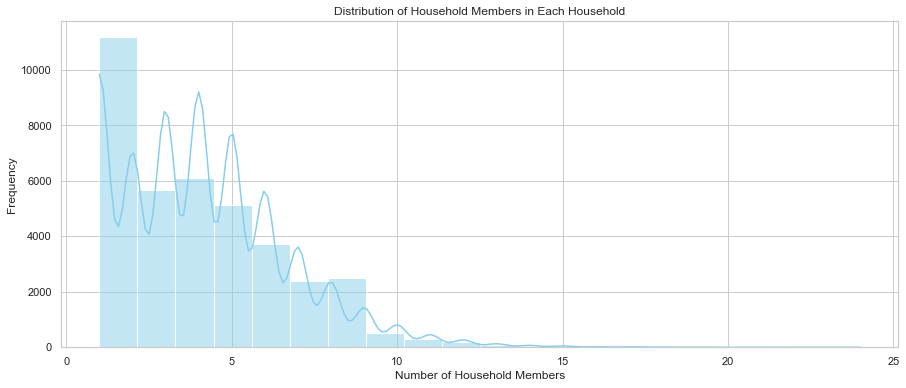

Top 10 Households with Highest Number of Household Members:


,household_id,number_of_household_members
0,1421 127,24.0
1,260 7,22.0
2,261 62,22.0
3,46 114,21.0
4,293 60,21.0
5,97 32,19.0
6,246 26,19.0
7,301 28,19.0
8,43 46,18.0
9,72 3,18.0


In [34]:
# Distribution of household members in household

# Setting the style of seaborn
sns.set(style="whitegrid")


# Converting DataFrame to a NumPy array before indexing
np_array = df_cleaned.to_numpy()

# Plotting the distribution
plt.figure(figsize=(15, 6))
sns.histplot(df_cleaned['number_of_household_members'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Household Members in Each Household')
plt.xlabel('Number of Household Members')
plt.ylabel('Frequency')
plt.show()

# Identify the top ten households
top_10_households = df_cleaned.groupby('household_id')['number_of_household_members'].max().nlargest(10)

# Create a DataFrame from the top_10_households Series
top_10_df = top_10_households.reset_index()

# Print the DataFrame
print("Top 10 Households with Highest Number of Household Members:")
top_10_df

#### ii) Distribution of number of children resident in each household

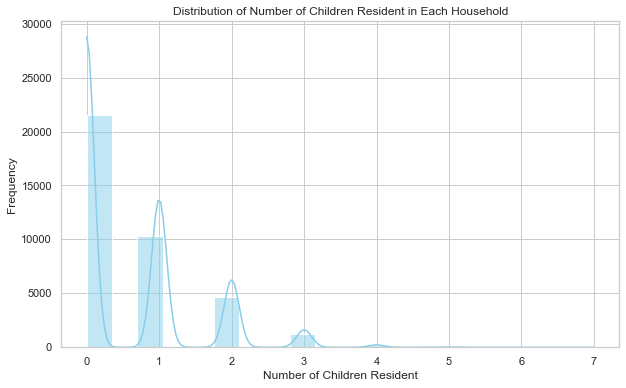

Top 20 Households with Highest Number of Children:


,household_id,number_of_children_resident
0,264 52,7.0
1,74 5,6.0
2,302 47,6.0
3,861 67,6.0
4,175 32,5.0
5,216 12,5.0
6,231 1,5.0
7,246 29,5.0
8,286 24,5.0
9,288 14,5.0


In [35]:
# Identify the top 20 households based on the sum of 'Number_of_children_resident'
top_20_households = df_cleaned.groupby('household_id')['number_of_children_resident'].sum().nlargest(10)

# Create a DataFrame from the top_20_households Series
top_20_df = top_20_households.reset_index()

# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['number_of_children_resident'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Number of Children Resident in Each Household')
plt.xlabel('Number of Children Resident')
plt.ylabel('Frequency')
plt.show()

# Print the DataFrame
print("Top 20 Households with Highest Number of Children:")
top_20_df

In [62]:
# Variable label dictionary
variable_label_2 = meta_2.variable_value_labels
variable_label = meta.variable_value_labels

In [63]:

def get_variable_label(column_label, df_excel, variable_labels):
    '''Function to get variable label'''
    # Looking up the column label
    matching_row = df_excel[df_excel['Label Names'] == column_label]

    # Getting the corresponding column name
    corresponding_column_name = matching_row['Column Names'].iloc[0] if not matching_row.empty else None

    # Getting variable label names
    variable_label = variable_labels.get(corresponding_column_name, None)

    return variable_label

In [64]:
# Calling the function to get variable labels
variable_label_has_net = get_variable_label('has_mosquito_net',df_excel_2, variable_label_2)

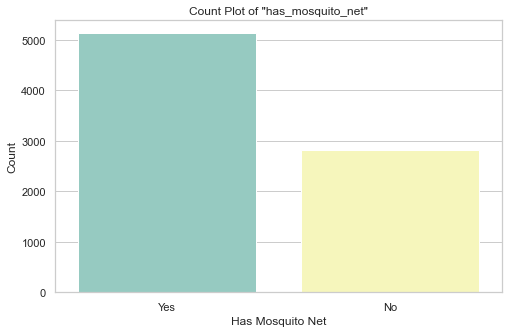

In [65]:
# Household has a mosquito net

# Mapping the variable labels to the column
household_has_mosquito_net = df_2_cleaned['has_mosquito_net'].map(variable_label_has_net).reset_index()

# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting the count plot
plt.figure(figsize=(8, 5))
sns.countplot(x='has_mosquito_net', data=household_has_mosquito_net, palette="Set3")
plt.title('Count Plot of "has_mosquito_net"')
plt.xlabel('Has Mosquito Net')
plt.ylabel('Count')
plt.show()

## 2.4) Building Model

* Model Interpretability and Explainability:

Enhance model interpretability to provide actionable insights for decision-makers by employing techniques such as SHAP values or feature importance analysis.


## 2.5) Conclusion

## 2.6) Recommendation

## 2.7) Model Deployment